In [70]:
import pyodbc
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

server = r"LAPTOP-F7QSMQRH"  
database = "Instant"                    

conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"
)

query = "SELECT * FROM shopping_trends"
df = pd.read_sql(query, conn)
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [71]:
df.info()
df.shape
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

0

In [72]:
df = df[['Age', 'Gender', 'Category', 'Purchase_Amount_USD', 'Season', 'Previous_Purchases','Review_Rating']]

In [73]:
df

,Age,Gender,Category,Purchase_Amount_USD,Season,Previous_Purchases,Review_Rating
0,55,Male,Clothing,53,Winter,14,3.1
1,19,Male,Clothing,64,Winter,2,3.1
2,50,Male,Clothing,73,Spring,23,3.1
3,21,Male,Footwear,90,Spring,49,3.5
4,45,Male,Clothing,49,Spring,31,2.7
...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Summer,32,4.2
3896,52,Female,Accessories,49,Spring,41,4.5
3897,46,Female,Accessories,33,Spring,24,2.9
3898,44,Female,Footwear,77,Summer,24,3.8


In [74]:
df.describe()

,Age,Purchase_Amount_USD,Previous_Purchases,Review_Rating
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,25.351538,3.749949
std,15.207589,23.685392,14.447125,0.716223
min,18.000000,20.000000,1.000000,2.500000
25%,31.000000,39.000000,13.000000,3.100000
50%,44.000000,60.000000,25.000000,3.700000
75%,57.000000,81.000000,38.000000,4.400000
max,70.000000,100.000000,50.000000,5.000000


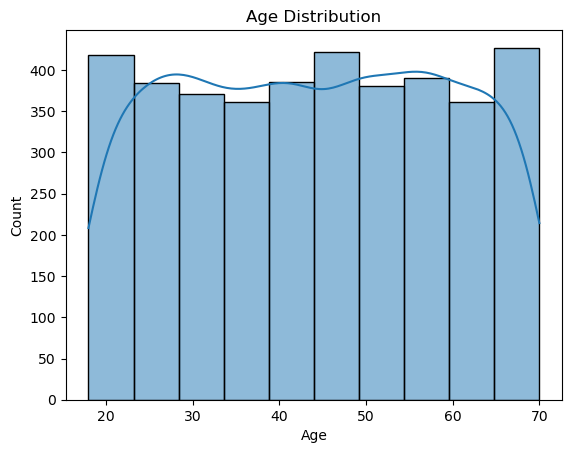

In [75]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

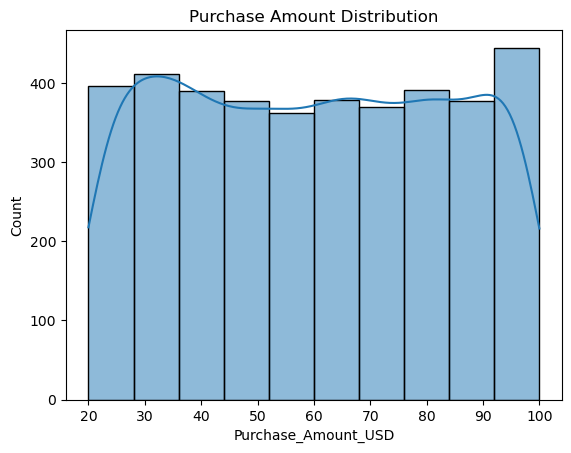

In [76]:
sns.histplot(df['Purchase_Amount_USD'], bins=10, kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

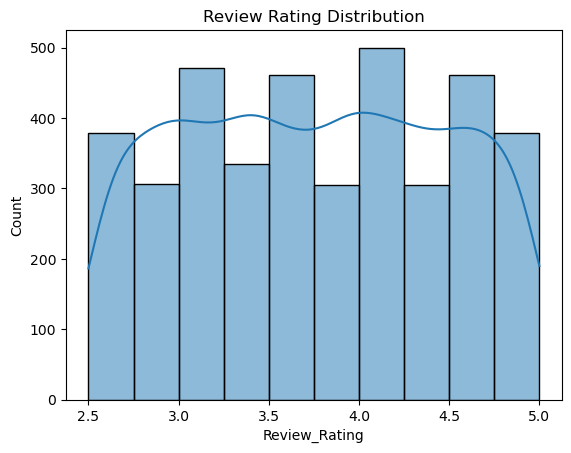

In [77]:
sns.histplot(df['Review_Rating'], bins=10, kde=True)
plt.title("Review Rating Distribution")
plt.show()

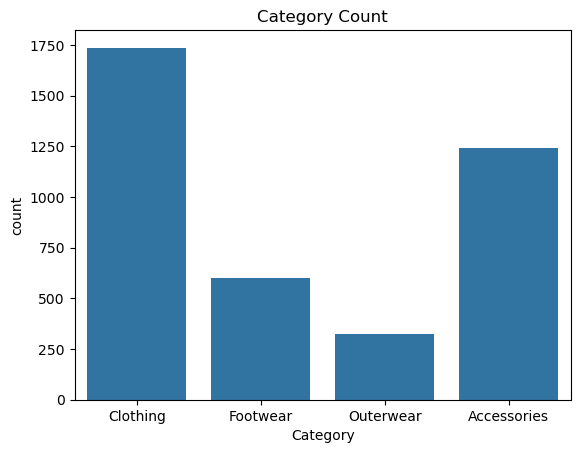

In [78]:
sns.countplot(x=df['Category'])
plt.title("Category Count")
plt.show()

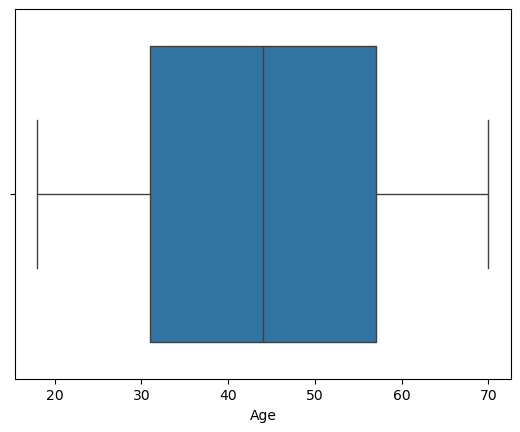

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.show()

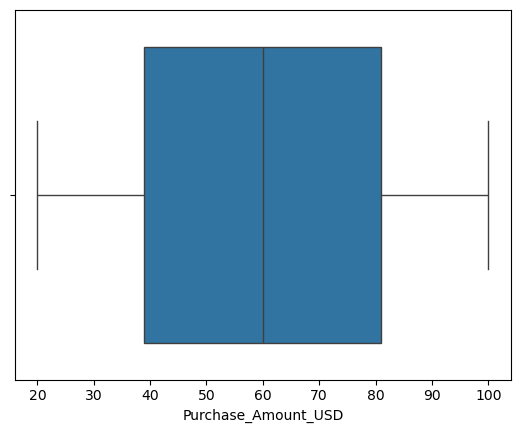

In [80]:
sns.boxplot(x=df['Purchase_Amount_USD'])
plt.show()

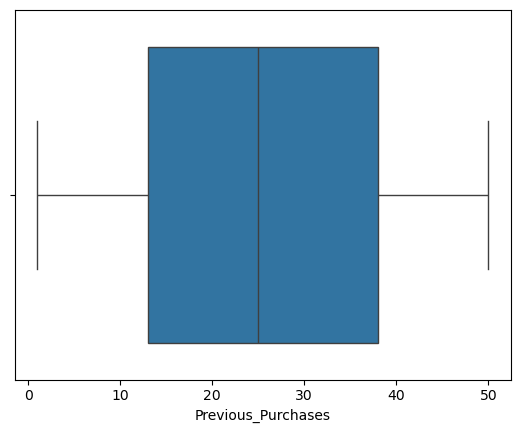

In [81]:
sns.boxplot(x=df['Previous_Purchases'])
plt.show()

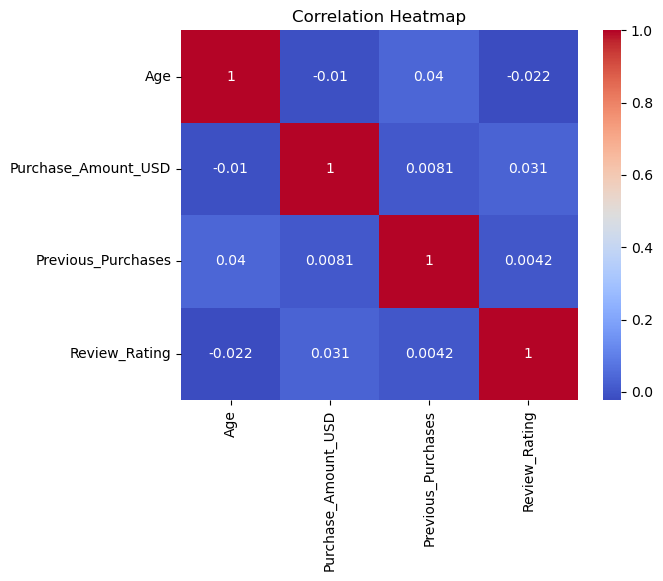

In [82]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [83]:
print(df.groupby('Gender')['Purchase_Amount_USD'].mean())

Gender
Female    60.249199
Male      59.536199
Name: Purchase_Amount_USD, dtype: float64


In [84]:
print(df.groupby('Category')['Purchase_Amount_USD'].mean())

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase_Amount_USD, dtype: float64


In [85]:
print(df.groupby('Season')['Purchase_Amount_USD'].mean())

Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase_Amount_USD, dtype: float64


# Insights

1. The dataset contains **3,900 customers** with no missing values or duplicates.  

2. The **average customer age is 44 years**, meaning most customers are middle-aged adults.  

3. The **average purchase amount is around $60**, with most purchases ranging between **$40 – $80**.  

4. **Female customers spend slightly more** on average ($60.25) compared to male customers ($59.53).  

5. Among all categories, **Footwear has the highest average purchase amount ($60.25)**, while **Outerwear has the lowest ($57.17)**.  

6. Spending is **highest in Fall ($61.55)** and lowest in **Summer ($58.40)**.  

7. **Most review ratings are between 3 and 4.5**, which indicates moderate to high customer satisfaction.  

8. There is **no strong correlation** between age, previous purchases, and purchase amount.  

9. The data is clean and ready for further visualization or dashboard creation (e.g., in Power BI or Plotly).  
otly).  
 amount.
